In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Datenimport**

In [2]:
total = pd.read_csv(r'C:...path...\bevoelkerung_halbjaehrlich2013bisEnde2023.csv',sep=';')

In [3]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   jahr                          210 non-null    int64 
 1   stichtag                      210 non-null    int64 
 2   stadtbezirk_id                210 non-null    int64 
 3   stadtbezirk_name              210 non-null    object
 4   einw_ges                      210 non-null    int64 
 5   einw_alter_unter1j            210 non-null    int64 
 6   einw_alter_1bis_unter3j       210 non-null    int64 
 7   einw_alter_3bis_unter5j       210 non-null    int64 
 8   einw_alter_5bis_unter6j       210 non-null    int64 
 9   einw_alter_6bis_unter10j      210 non-null    int64 
 10  einw_alter_10bis_unter14j     210 non-null    int64 
 11  einw_alter_14bis_unter15j     210 non-null    int64 
 12  einw_alter_15bis_unter18j     210 non-null    int64 
 13  einw_alter_18bis_unt

In [4]:
# nur relevante Spalten und Stichtag 31.12. je Jahr
total['stichtag'] = total['stichtag'].astype(str)
total = total[total['stichtag'].str.contains('1231')]

total = total[['jahr', 'stadtbezirk_name', 'einw_ges']]
total = total[total['jahr'] >= 2014]
total

,jahr,stadtbezirk_name,einw_ges
0,2023,Mitte,81616
1,2023,Schildesche,42595
2,2023,Gadderbaum,10210
3,2023,Brackwede,40873
4,2023,Dornberg,20297
...,...,...,...
185,2014,Jöllenbeck,21861
186,2014,Heepen,46947
187,2014,Stieghorst,31842
188,2014,Sennestadt,21209


**Anteile Stadtbezirke 2023**

In [5]:
Split_Bezirke_2023 = total[total['jahr'] == 2023].reset_index()
Split_Bezirke_2023['Anteil_in_%'] = ((Split_Bezirke_2023['einw_ges'] / Split_Bezirke_2023['einw_ges'].sum()) * 100).round(1)
Split_Bezirke_2023 = Split_Bezirke_2023.sort_values(by='Anteil_in_%', ascending=False)
Split_Bezirke_2023 = Split_Bezirke_2023.rename(columns={'einw_ges': 'Einwohner 2023'})
Split_Bezirke_2023[['stadtbezirk_name', 'Einwohner 2023', 'Anteil_in_%']]

,stadtbezirk_name,Einwohner 2023,Anteil_in_%
0,Mitte,81616,23.7
6,Heepen,48251,14.0
1,Schildesche,42595,12.4
3,Brackwede,40873,11.9
7,Stieghorst,33110,9.6
5,Jöllenbeck,23309,6.8
8,Sennestadt,22415,6.5
9,Senne,21333,6.2
4,Dornberg,20297,5.9
2,Gadderbaum,10210,3.0


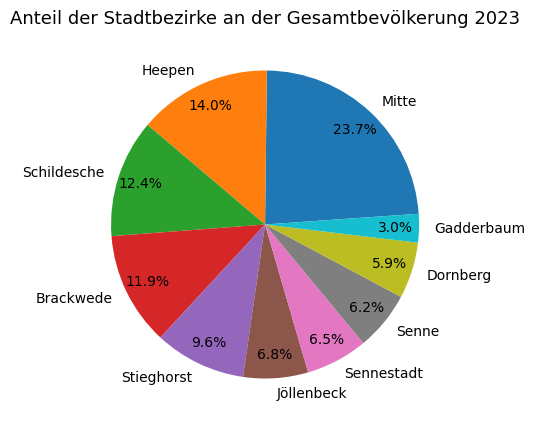

In [6]:
plt.figure(figsize=(5, 5))
plt.pie(Split_Bezirke_2023['Anteil_in_%'], labels=Split_Bezirke_2023['stadtbezirk_name'], autopct='%1.1f%%', startangle=4, labeldistance=1.1, pctdistance=0.85)
plt.title('Anteil der Stadtbezirke an der Gesamtbevölkerung 2023', fontsize=13)
plt.show()

**Entwicklung Gesamtbevölkerung**

In [7]:
Entw = total.groupby('jahr').sum()['einw_ges'].reset_index()
Entw['Entwicklung_in_Prozent'] = Entw['einw_ges'].pct_change() * 100
Entw['Entwicklung_in_Prozent'] = Entw['Entwicklung_in_Prozent'].round(2)
Entw

,jahr,einw_ges,Entwicklung_in_Prozent
0,2014,329327,NaN
1,2015,333998,1.42
2,2016,336352,0.70
3,2017,337219,0.26
4,2018,339367,0.64
5,2019,339842,0.14
6,2020,338980,-0.25
7,2021,339419,0.13
8,2022,343771,1.28
9,2023,344009,0.07


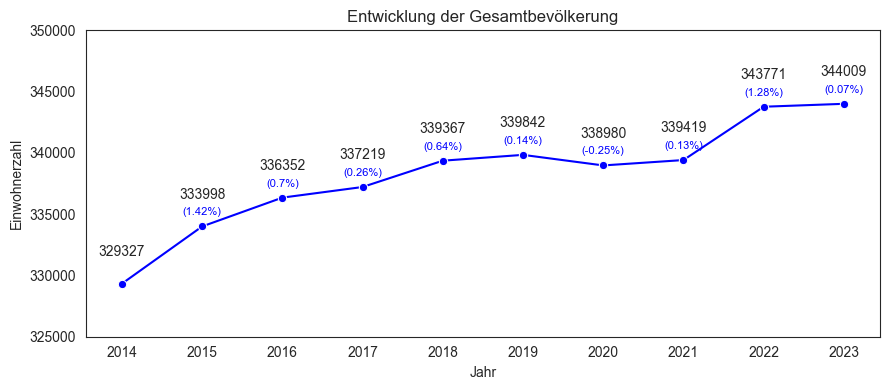

In [8]:
sns.set_style("white")
plt.figure(figsize=(9, 4))

sns.lineplot(data=Entw, x='jahr', y='einw_ges', marker='o', color='blue')

# Beschriftung absolut
for i, txt in enumerate(Entw['einw_ges']):
    plt.annotate(txt, (Entw['jahr'][i], Entw['einw_ges'][i]), textcoords="offset points", xytext=(0,20), ha='center')

# Beschriftungen Entwicklung 
for i, txt in enumerate(Entw['Entwicklung_in_Prozent']):
    if pd.notna(txt):
        plt.annotate(f"({txt}%)", (Entw['jahr'][i], Entw['einw_ges'][i]), textcoords="offset points", xytext=(0,8), ha='center', color='blue', fontsize=8)


plt.xlabel('Jahr')
plt.ylabel('Einwohnerzahl')
plt.title('Entwicklung der Gesamtbevölkerung')

plt.ylim(325000, 350000)  
plt.xticks(Entw['jahr'])

plt.tight_layout()
plt.show()

Die absolute Bevölkerung wächst von 2014 bis 2023 konstant (Ausnahme 2020; vermutlich wegen Corona) und liegt in 2023 bei 344.009 Menschen. In 2015 und 2022 sieht man eindeutig die beiden Flüchtlingswellen.

**Bevölkerungsentwicklung pro Bezirk**

In [9]:
total_pvt = total.pivot(index='stadtbezirk_name', columns='jahr', values='einw_ges')
total_pvt

jahr,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
stadtbezirk_name,,,,,,,,,,
Brackwede,38826,39729,40069,40455,40646,40753,40621,40814,41123,40873
Dornberg,19074,19126,19202,19313,19486,19640,19588,19681,20083,20297
Gadderbaum,10301,10367,10321,10301,10342,10371,10300,10239,10471,10210
Heepen,46947,48028,47606,47517,47429,47396,47189,47152,47902,48251
Jöllenbeck,21861,21919,22192,22120,22258,22413,22866,23105,23320,23309
Mitte,78043,79153,80144,80406,81809,81456,80613,80403,81544,81616
Schildesche,41070,41395,41887,42050,42263,42543,42322,42410,42485,42595
Senne,20154,20720,20964,21058,21123,21135,21069,21123,21321,21333
Sennestadt,21209,21367,21674,21710,21809,21976,22080,22200,22472,22415


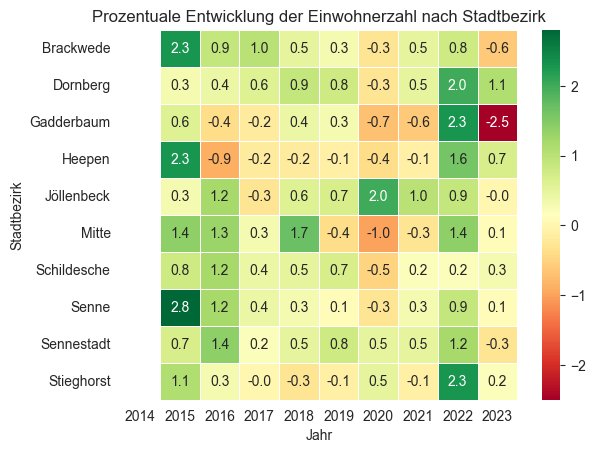

In [10]:
# prozentuale Entwicklung je Bezirk pro Jahr 
entwicklung_prozent_bezirke = pd.DataFrame()

for jahr in total_pvt.T.columns:
    entwicklung_prozent_bezirke[jahr] = total_pvt.T[jahr].pct_change() * 100
    entwicklung_prozent_bezirke[jahr] = entwicklung_prozent_bezirke[jahr].round(1)

entwicklung_prozent_bezirke = entwicklung_prozent_bezirke.T  # Transponieren, um die ursprüngliche Ausrichtung wiederherzustellen

# Heatmap
sns.heatmap(entwicklung_prozent_bezirke, cmap='RdYlGn', annot=True, fmt=".1f", linewidth=.5)
plt.title('Prozentuale Entwicklung der Einwohnerzahl nach Stadtbezirk')
plt.xlabel('Jahr')
plt.ylabel('Stadtbezirk')

plt.show()

In [11]:
# prozentuale Entwicklung je Bezirk von 2014 - 2023 total

total_pvt['Entwicklung_in_Prozent'] = (((total_pvt[2023] - total_pvt[2014]) / total_pvt[2014]) * 100).round(1)
total_pvt = total_pvt[['Entwicklung_in_Prozent']].sort_values(by='Entwicklung_in_Prozent', ascending=False)
total_pvt[['Entwicklung_in_Prozent']]

jahr,Entwicklung_in_Prozent
stadtbezirk_name,
Jöllenbeck,6.6
Dornberg,6.4
Senne,5.8
Sennestadt,5.7
Brackwede,5.3
Mitte,4.6
Stieghorst,4.0
Schildesche,3.7
Heepen,2.8


- Von 2014-2023 haben Jöllenbeck und Dornberg die positivste Entwicklung, während Gadderbaum sogar Einwohner verliert.
- Die negative Entwicklung in Gadderbaum ist vor allem auf das Jahr 2023 zurückzuführen. In den Jahren davor ist die Entwicklung teilweise sogar besser als in den anderen Stadtbezirken. 
- Die insgesamt positive Entwicklung von 2014 bis 2023 in Stieghorst und Heepen wird stark durch einen Einwohnerzuwachs im Jahr 2022 getrieben, in den Jahren davor ist die Entwicklung häufig sogar negativ.
      
   

**Neuer Datensatz: Entwicklungen pro Bezirk**

In [12]:
# neuer Datensatz
bew = pd.read_csv(r'C:...path...\bevoelkerungsbewegung2014bis2023.csv',sep=';')
bew

,jahr,stadtbezirk_id,stadtbezirk_name,wanderung_ueber_stadtgrenze_zuzug,wanderung_ueber_stadtgrenze_fortzug,wanderung_ueber_stadtgrenze_saldo,wanderung_innerstaedtisch_zuzug,wanderung_innerstaedtisch_fortzug,wanderung_innerstaedtisch_saldo,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_mitte,...,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_dornberg,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_joellenbeck,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_heepen,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_stieghorst,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_sennestadt,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_senne,raeumliche_bevoelkerungsbewegung_saldo,geburten,sterbefaelle,natuerliche_bevoelkerungsbewegung_saldo
0,2014,57110000,Mitte,5564,4790,774,7183.0,7811.0,-628,0,...,-27,-23,-205,-83,-39,-6,146,807,750,57
1,2014,57110001,Schildesche,2215,2003,212,3314.0,3193.0,121,200,...,-11,-40,6,7,-16,12,333,373,476,-103
2,2014,57110002,Gadderbaum,560,435,125,837.0,895.0,-58,-15,...,1,-8,-8,1,5,-36,67,82,162,-80
3,2014,57110003,Brackwede,1664,1433,231,2798.0,2744.0,54,60,...,-15,6,13,-9,-78,42,285,360,413,-53
4,2014,57110004,Dornberg,821,836,-15,1032.0,987.0,45,27,...,0,-5,12,-4,2,-12,30,151,183,-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,57110005,Jöllenbeck,713,774,-61,1038.0,955.0,83,7,...,8,0,4,8,-9,-5,22,202,237,-35
96,2023,57110006,Heepen,1795,1643,152,2643.0,2498.0,145,164,...,12,-4,0,17,-32,-37,297,454,515,-61
97,2023,57110007,Stieghorst,1239,1214,25,1893.0,1774.0,119,150,...,-2,-8,-17,0,-6,-8,144,331,403,-72
98,2023,57110008,Sennestadt,936,997,-61,1214.0,1069.0,145,35,...,6,9,32,6,0,16,84,190,330,-140


In [13]:
bew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   jahr                                                         100 non-null    int64  
 1   stadtbezirk_id                                               100 non-null    int64  
 2   stadtbezirk_name                                             100 non-null    object 
 3   wanderung_ueber_stadtgrenze_zuzug                            100 non-null    int64  
 4   wanderung_ueber_stadtgrenze_fortzug                          100 non-null    int64  
 5   wanderung_ueber_stadtgrenze_saldo                            100 non-null    int64  
 6   wanderung_innerstaedtisch_zuzug                              100 non-null    float64
 7   wanderung_innerstaedtisch_fortzug                            100 non-null    floa

In [14]:
bew = bew.astype({"wanderung_innerstaedtisch_zuzug": 'int', "wanderung_innerstaedtisch_fortzug": 'int'})

In [15]:
## Neue absolut Spalten für jeden Bezirk (neu gesamt und weg gesamt)

bew['neu_absolut'] = bew['wanderung_ueber_stadtgrenze_zuzug']+bew['wanderung_innerstaedtisch_zuzug']+bew['geburten']
bew['weg_absolut'] = bew['wanderung_ueber_stadtgrenze_fortzug']+bew['wanderung_innerstaedtisch_fortzug']+bew['sterbefaelle']
bew

,jahr,stadtbezirk_id,stadtbezirk_name,wanderung_ueber_stadtgrenze_zuzug,wanderung_ueber_stadtgrenze_fortzug,wanderung_ueber_stadtgrenze_saldo,wanderung_innerstaedtisch_zuzug,wanderung_innerstaedtisch_fortzug,wanderung_innerstaedtisch_saldo,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_mitte,...,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_heepen,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_stieghorst,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_sennestadt,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_senne,raeumliche_bevoelkerungsbewegung_saldo,geburten,sterbefaelle,natuerliche_bevoelkerungsbewegung_saldo,neu_absolut,weg_absolut
0,2014,57110000,Mitte,5564,4790,774,7183,7811,-628,0,...,-205,-83,-39,-6,146,807,750,57,13554,13351
1,2014,57110001,Schildesche,2215,2003,212,3314,3193,121,200,...,6,7,-16,12,333,373,476,-103,5902,5672
2,2014,57110002,Gadderbaum,560,435,125,837,895,-58,-15,...,-8,1,5,-36,67,82,162,-80,1479,1492
3,2014,57110003,Brackwede,1664,1433,231,2798,2744,54,60,...,13,-9,-78,42,285,360,413,-53,4822,4590
4,2014,57110004,Dornberg,821,836,-15,1032,987,45,27,...,12,-4,2,-12,30,151,183,-32,2004,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,57110005,Jöllenbeck,713,774,-61,1038,955,83,7,...,4,8,-9,-5,22,202,237,-35,1953,1966
96,2023,57110006,Heepen,1795,1643,152,2643,2498,145,164,...,0,17,-32,-37,297,454,515,-61,4892,4656
97,2023,57110007,Stieghorst,1239,1214,25,1893,1774,119,150,...,-17,0,-6,-8,144,331,403,-72,3463,3391
98,2023,57110008,Sennestadt,936,997,-61,1214,1069,145,35,...,32,6,0,16,84,190,330,-140,2340,2396


**"Fluktuation" in den verschiedenen Bezirken**

In [16]:
# Split Einwohner eines Bezirks in "neu" und "alt"/konstant
merged_total_bew = pd.merge(total, bew, on=['jahr', 'stadtbezirk_name'])
konstant_new_split = merged_total_bew[['jahr', 'stadtbezirk_name', 'einw_ges', 'neu_absolut']].copy()

konstant_new_split['konstant_absolut'] = (konstant_new_split['einw_ges'] - konstant_new_split['neu_absolut']).round(2)
konstant_new_split['%_neu_absolut'] = (konstant_new_split['neu_absolut'] / konstant_new_split['einw_ges'] * 100).round(2)
konstant_new_split['%_konstant_absolut'] = ((konstant_new_split['einw_ges'] - konstant_new_split['neu_absolut']) / konstant_new_split['einw_ges'] * 100).round(2)

konstant_new_split

,jahr,stadtbezirk_name,einw_ges,neu_absolut,konstant_absolut,%_neu_absolut,%_konstant_absolut
0,2023,Mitte,81616,22507,59109,27.58,72.42
1,2023,Schildesche,42595,5650,36945,13.26,86.74
2,2023,Gadderbaum,10210,1234,8976,12.09,87.91
3,2023,Brackwede,40873,4897,35976,11.98,88.02
4,2023,Dornberg,20297,2209,18088,10.88,89.12
...,...,...,...,...,...,...,...
95,2014,Jöllenbeck,21861,2187,19674,10.00,90.00
96,2014,Heepen,46947,4979,41968,10.61,89.39
97,2014,Stieghorst,31842,3519,28323,11.05,88.95
98,2014,Sennestadt,21209,2481,18728,11.70,88.30


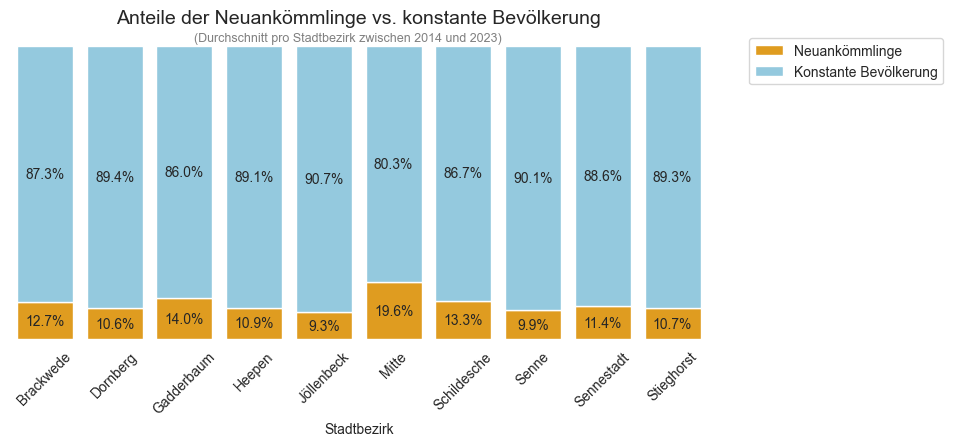

In [17]:
grouped_mean = konstant_new_split.groupby('stadtbezirk_name')[['%_neu_absolut', '%_konstant_absolut']].mean()

fig = plt.figure(figsize=(9, 4))

sns.barplot(data=grouped_mean, x=grouped_mean.index, y='%_neu_absolut', color='orange', label='Neuankömmlinge')
sns.barplot(data=grouped_mean, x=grouped_mean.index, y='%_konstant_absolut', color='skyblue', bottom=grouped_mean['%_neu_absolut'], label='Konstante Bevölkerung')

plt.xlabel('Stadtbezirk')

plt.title('Anteile der Neuankömmlinge vs. konstante Bevölkerung', fontsize=14)
plt.suptitle('(Durchschnitt pro Stadtbezirk zwischen 2014 und 2023)', y=0.88, fontsize=9, color='gray')

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for ax in plt.gca().patches:
    width, height = ax.get_width(), ax.get_height()
    x, y = ax.get_xy()
    plt.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

sns.despine(left=True, bottom=True)
plt.gca().axes.get_yaxis().set_visible(False)  # Y-Achse ausblenden

plt.show()


80% der Einwohner von Mitte waren bereits im Vorjahr dort, 20% kamen im Laufe des Jahres hinzu. Die Gesamtentwicklung liegt mit 4,6% jedoch nur im Mittelfeld, was gleichzeitig auf einen starken Bevölkerungsrückgang und damit auf eine hohe “Fluktuation” (vermutlich stark durch Studierende getrieben) hindeutet.

Umgekehrt verhält es sich in Jöllenbeck: Beste Entwicklung 2014-2023 mit 6,62%, aber der geringste Anteil an “Neubürgern”. Das bedeutet, dass hier vergleichsweise wenige Menschen zuziehen, aber auch wenige wegziehen. Dies würde zu einem Stadtteil für Familien passen, da diese aufgrund von Faktoren wie Schule und Eigentum oft nicht einfach umziehen würden.  


In [18]:
# Neue Spalten: Berechnung der prozentualen Anteile der verschiedenen Arten des Zuzugs/Fortzugs an Gesamtbevölkerung

# alle, die neu sind
merged_total_bew['%_neu_total'] = ((merged_total_bew['neu_absolut'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_außerstädtisch_zuzug'] = ((merged_total_bew['wanderung_ueber_stadtgrenze_zuzug'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_innerstaedtisch_zuzug'] = ((merged_total_bew['wanderung_innerstaedtisch_zuzug'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_geburten'] = ((merged_total_bew['geburten'] / merged_total_bew['einw_ges']) * 100).round(2)

# alle, die weggezogen sind
merged_total_bew['%_weg_total'] = ((merged_total_bew['weg_absolut'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_außerstädtisch_fortzug'] = ((merged_total_bew['wanderung_ueber_stadtgrenze_fortzug'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_innerstaedtisch_fortzug'] = ((merged_total_bew['wanderung_innerstaedtisch_fortzug'] / merged_total_bew['einw_ges']) * 100).round(2)
merged_total_bew['%_sterbefaelle'] = ((merged_total_bew['sterbefaelle'] / merged_total_bew['einw_ges']) * 100).round(2)

merged_total_bew

,jahr,stadtbezirk_name,einw_ges,stadtbezirk_id,wanderung_ueber_stadtgrenze_zuzug,wanderung_ueber_stadtgrenze_fortzug,wanderung_ueber_stadtgrenze_saldo,wanderung_innerstaedtisch_zuzug,wanderung_innerstaedtisch_fortzug,wanderung_innerstaedtisch_saldo,...,neu_absolut,weg_absolut,%_neu_total,%_außerstädtisch_zuzug,%_innerstaedtisch_zuzug,%_geburten,%_weg_total,%_außerstädtisch_fortzug,%_innerstaedtisch_fortzug,%_sterbefaelle
0,2023,Mitte,81616,57110000,15096,14334,762,6604,7171,-567,...,22507,22286,27.58,18.50,8.09,0.99,27.31,17.56,8.79,0.96
1,2023,Schildesche,42595,57110001,2414,2180,234,2875,2849,26,...,5650,5548,13.26,5.67,6.75,0.85,13.03,5.12,6.69,1.22
2,2023,Gadderbaum,10210,57110002,493,427,66,678,867,-189,...,1234,1468,12.09,4.83,6.64,0.62,14.38,4.18,8.49,1.70
3,2023,Brackwede,40873,57110003,2141,2229,-88,2397,2376,21,...,4897,5109,11.98,5.24,5.86,0.88,12.50,5.45,5.81,1.23
4,2023,Dornberg,20297,57110004,1013,809,204,1065,977,88,...,2209,1996,10.88,4.99,5.25,0.65,9.83,3.99,4.81,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,Jöllenbeck,21861,57110005,733,773,-40,1231,1175,56,...,2187,2165,10.00,3.35,5.63,1.02,9.90,3.54,5.37,0.99
96,2014,Heepen,46947,57110006,1418,1454,-36,3079,2868,211,...,4979,4789,10.61,3.02,6.56,1.03,10.20,3.10,6.11,0.99
97,2014,Stieghorst,31842,57110007,1196,1193,3,1989,2009,-20,...,3519,3511,11.05,3.76,6.25,1.05,11.03,3.75,6.31,0.97
98,2014,Sennestadt,21209,57110008,800,822,-22,1468,1276,192,...,2481,2353,11.70,3.77,6.92,1.00,11.09,3.88,6.02,1.20


**Die "Neuen"**

In [19]:
# Gruppierung nach Bezirk
grouped_df_an_ges = merged_total_bew.groupby('stadtbezirk_name').mean()
grouped_df_an_ges = grouped_df_an_ges[['%_neu_total',	'%_außerstädtisch_zuzug', '%_innerstaedtisch_zuzug', '%_geburten']].round(2)

grouped_df_an_ges

,%_neu_total,%_außerstädtisch_zuzug,%_innerstaedtisch_zuzug,%_geburten
stadtbezirk_name,,,,
Brackwede,12.72,5.02,6.69,1.01
Dornberg,10.59,4.65,5.17,0.78
Gadderbaum,13.99,5.48,7.75,0.76
Heepen,10.88,4.33,5.54,1.01
Jöllenbeck,9.29,3.34,5.02,0.93
Mitte,19.65,10.53,8.06,1.06
Schildesche,13.25,5.62,6.69,0.94
Senne,9.90,3.64,5.34,0.92
Sennestadt,11.39,4.68,5.72,0.99


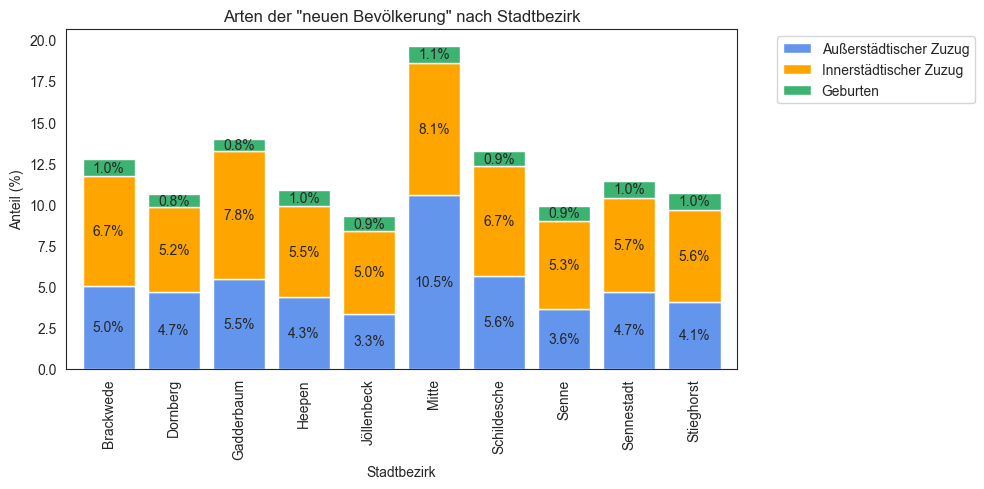

In [20]:
# Darstellung
grouped_df_an_ges_without_total = grouped_df_an_ges[['%_außerstädtisch_zuzug', '%_innerstaedtisch_zuzug', '%_geburten']]
stadtbezirke = grouped_df_an_ges_without_total.index.tolist()

labels = ['Außerstädtischer Zuzug', 'Innerstädtischer Zuzug', 'Geburten']
colors = ['cornflowerblue', 'orange', 'mediumseagreen']

ax = grouped_df_an_ges_without_total.plot(kind='bar', stacked=True, width=0.8, figsize=(10, 5), color=colors)

ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Stadtbezirk')
ax.set_title('Arten der "neuen Bevölkerung" nach Stadtbezirk')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')
    
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Die Balken repräsentieren (aufsummiert) den gelben Teil aus der vorherigen Darstellung. Einmal als Prozent an der Gesamtbevölkerung (oben), und einmal normalisiert, um die Anteile besser vergleichen zu können (unten).


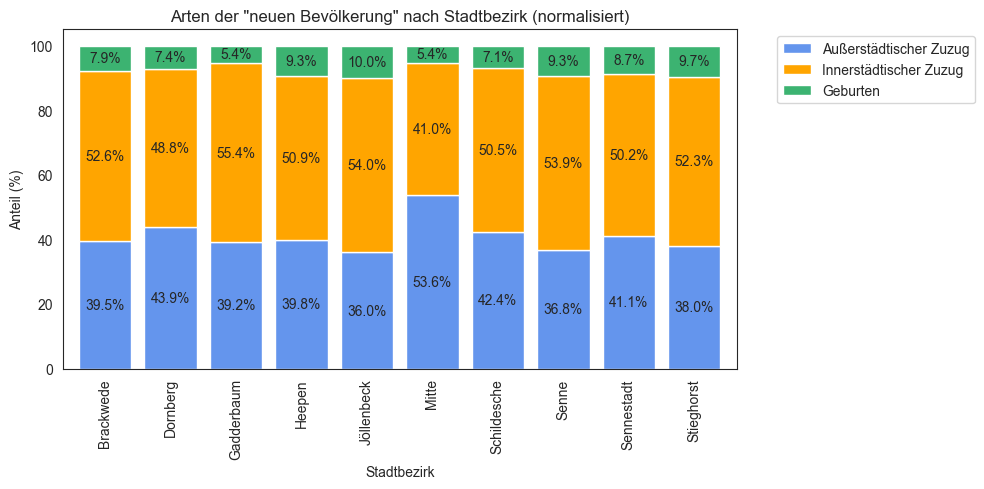

In [21]:
# Normalisierung, um die Verhältnisse besser zu erkennen
grouped_df_normalized = grouped_df_an_ges_without_total.div(grouped_df_an_ges_without_total.sum(axis=1), axis=0) * 100

labels = ['Außerstädtischer Zuzug', 'Innerstädtischer Zuzug', 'Geburten']
colors = ['cornflowerblue', 'orange', 'mediumseagreen']

ax = grouped_df_normalized.plot(kind='bar', stacked=True, width=0.8, figsize=(10, 5), color=colors)

ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Stadtbezirk')
ax.set_title('Arten der "neuen Bevölkerung" nach Stadtbezirk (normalisiert)')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')

plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In Mitte kommt der größte Teil der Zuzüge von außerhalb Bielefelds. In allen anderen Stadtbezirken kommen die Zuzüge deutlich häufiger aus einem anderen Stadtbezirk innerhalb Bielefelds.

Meine Unterstellung, dass Jöllenbeck wahrscheinlich einen hohen Anteil an Familien hat, wird durch den höchsten Anteil an Geburten bekräftigt.

**Die Weggezogenen**

In [22]:
grouped_df_an_ges2 = merged_total_bew.groupby('stadtbezirk_name').mean()
grouped_df_an_ges2 = grouped_df_an_ges2[['%_weg_total',	'%_außerstädtisch_fortzug', '%_innerstaedtisch_fortzug', '%_sterbefaelle']].round(2)

grouped_df_an_ges2

,%_weg_total,%_außerstädtisch_fortzug,%_innerstaedtisch_fortzug,%_sterbefaelle
stadtbezirk_name,,,,
Brackwede,12.18,4.58,6.41,1.19
Dornberg,10.03,4.30,4.74,0.99
Gadderbaum,14.11,4.37,8.31,1.43
Heepen,10.69,4.04,5.59,1.06
Jöllenbeck,8.67,3.43,4.25,0.99
Mitte,19.11,9.40,8.77,0.93
Schildesche,12.82,5.01,6.58,1.23
Senne,9.47,3.55,4.85,1.06
Sennestadt,10.77,4.11,5.24,1.43


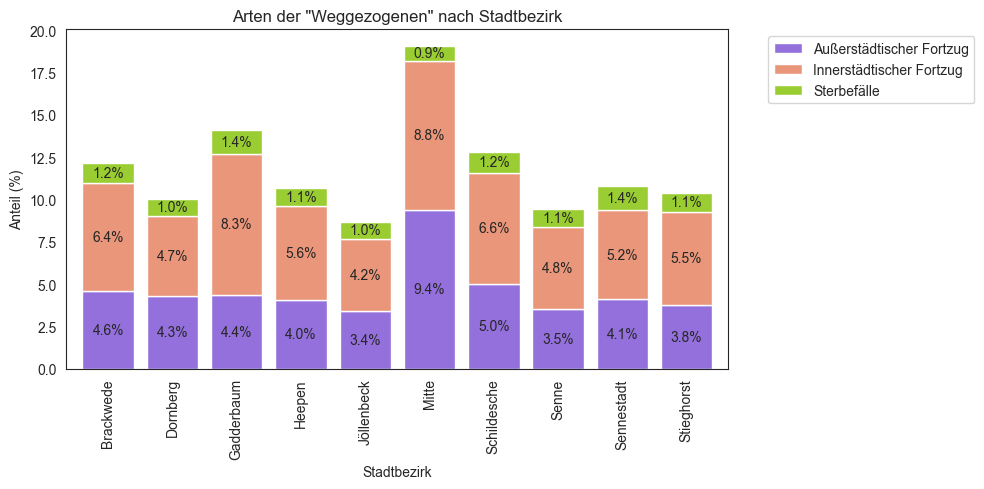

In [23]:
grouped_df_an_ges_without_total2 = grouped_df_an_ges2[['%_außerstädtisch_fortzug', '%_innerstaedtisch_fortzug', '%_sterbefaelle']]
stadtbezirke = grouped_df_an_ges_without_total2.index.tolist()

labels = ['Außerstädtischer Fortzug', 'Innerstädtischer Fortzug', 'Sterbefälle']
colors = ['mediumpurple', 'darksalmon', 'yellowgreen']

ax = grouped_df_an_ges_without_total2.plot(kind='bar', stacked=True, width=0.8, figsize=(10, 5), color=colors)

ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Stadtbezirk')
ax.set_title('Arten der "Weggezogenen" nach Stadtbezirk')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')
    
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

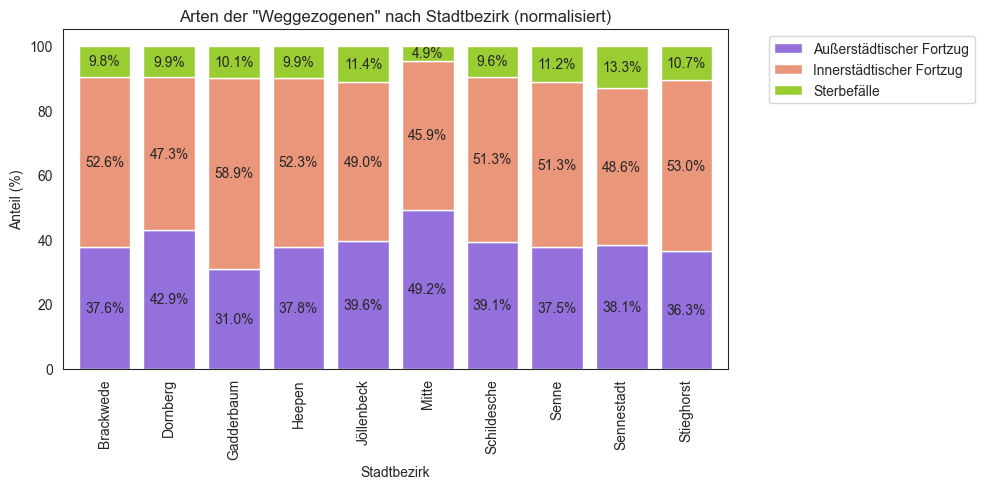

In [24]:
# Normalisierung, um die Verhältnisse besser zu erkennen 
grouped_df_normalized2 = grouped_df_an_ges_without_total2.div(grouped_df_an_ges_without_total2.sum(axis=1), axis=0) * 100

labels = ['Außerstädtischer Fortzug', 'Innerstädtischer Fortzug', 'Sterbefälle']
colors = ['mediumpurple', 'darksalmon', 'yellowgreen']

ax = grouped_df_normalized2.plot(kind='bar', stacked=True, width=0.8, figsize=(10, 5), color=colors)

ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Stadtbezirk')
ax.set_title('Arten der "Weggezogenen" nach Stadtbezirk (normalisiert)')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')

plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Mitte sticht erneut heraus. Die Sterberate ist mit Abstand am niedrigsten und die Einwohner ziehen häufiger aus Bielefeld weg als in einen anderen Stadtbezirk. Dies spricht wieder für einen hohen Anteil an Studierenden. Der vergleichsweise hohe Anteil an außerstädtischen Fortzügen in Dornberg (Universitätsnähe!) bestätigt diese These.


**Innerstädtische Wanderung**

Im Datensatz gab es nur den Saldo zwischen zwei Stadtteilen, nicht die absoluten Zahlen!

In [25]:
innerstädtisch_total = merged_total_bew.groupby('stadtbezirk_name')['wanderung_innerstaedtisch_saldo'].sum().reset_index()
innerstädtisch_total = innerstädtisch_total.sort_values(by='wanderung_innerstaedtisch_saldo')
innerstädtisch_total

,stadtbezirk_name,wanderung_innerstaedtisch_saldo
5,Mitte,-6192
2,Gadderbaum,-574
3,Heepen,-170
9,Stieghorst,205
6,Schildesche,426
1,Dornberg,910
8,Sennestadt,1141
0,Brackwede,1143
7,Senne,1148
4,Jöllenbeck,1963


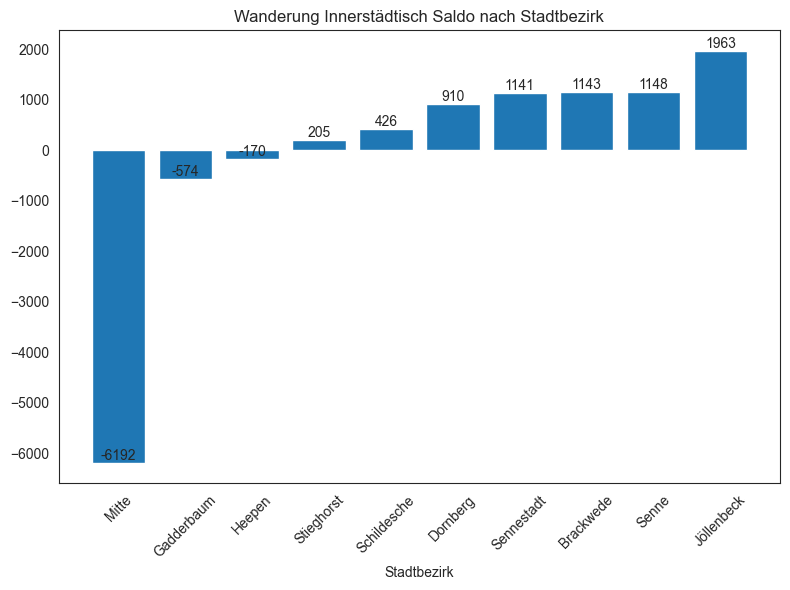

In [26]:
plt.figure(figsize=(8, 6))
bars = plt.bar(innerstädtisch_total['stadtbezirk_name'], innerstädtisch_total['wanderung_innerstaedtisch_saldo'])

plt.xlabel('Stadtbezirk')
plt.title('Wanderung Innerstädtisch Saldo nach Stadtbezirk')

plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

Dass es in Mitte die höchsten innerstädtischen Verluste gibt, wurde prozentual bereits in den letzten Grafiken deutlich. In absoluten Zahlen wird dies noch deutlicher, da es sich um den mit Abstand größten Stadtbezirk handelt.

In [27]:
# Auswahl der benötigten Spalten aus ursprünglichem dataframe
selected_columns = ['stadtbezirk_name', 'jahr'] + [col for col in bew.columns if 'wanderung_innerstaedtisch_saldo_mit_stadtbezirk' in col]
selected_df = bew[selected_columns]
selected_df

,stadtbezirk_name,jahr,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_mitte,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_schildesche,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_gadderbaum,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_brackwede,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_dornberg,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_joellenbeck,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_heepen,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_stieghorst,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_sennestadt,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_senne
0,Mitte,2014,0,-200,15,-60,-27,-23,-205,-83,-39,-6
1,Schildesche,2014,200,0,-9,-28,-11,-40,6,7,-16,12
2,Gadderbaum,2014,-15,9,0,-7,1,-8,-8,1,5,-36
3,Brackwede,2014,60,28,7,0,-15,6,13,-9,-78,42
4,Dornberg,2014,27,11,-1,15,0,-5,12,-4,2,-12
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jöllenbeck,2023,7,49,16,5,8,0,4,8,-9,-5
96,Heepen,2023,164,2,12,11,12,-4,0,17,-32,-37
97,Stieghorst,2023,150,-3,4,9,-2,-8,-17,0,-6,-8
98,Sennestadt,2023,35,4,-4,41,6,9,32,6,0,16


In [28]:
# Summe über alle Jahre pro Bezirk
grouped_saldo_per_bezirk = bew.groupby('stadtbezirk_name')[[col for col in bew.columns if 'wanderung_innerstaedtisch_saldo_mit_stadtbezirk' in col]].sum()

desired_order = ['Mitte', 'Schildesche', 'Gadderbaum', 'Brackwede', 'Dornberg', 'Jöllenbeck', 'Heepen', 'Stieghorst', 'Sennestadt', 'Senne']  
grouped_saldo_per_bezirk = grouped_saldo_per_bezirk.reindex(desired_order)

grouped_saldo_per_bezirk

,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_mitte,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_schildesche,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_gadderbaum,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_brackwede,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_dornberg,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_joellenbeck,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_heepen,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_stieghorst,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_sennestadt,wanderung_innerstaedtisch_saldo_mit_stadtbezirk_senne
stadtbezirk_name,,,,,,,,,,
Mitte,0,-1856,-192,-921,-536,-632,-375,-1123,-208,-349
Schildesche,1856,0,37,-247,-446,-753,65,-22,-33,-31
Gadderbaum,192,-37,0,-268,-81,-70,-115,31,-45,-181
Brackwede,921,247,268,0,62,6,25,88,-278,-196
Dornberg,536,446,81,-62,0,-158,55,47,4,-39
Jöllenbeck,632,753,70,-6,158,0,280,97,-17,-4
Heepen,375,-65,115,-25,-55,-280,0,118,-172,-181
Stieghorst,1123,22,-31,-88,-47,-97,-118,0,-289,-270
Sennestadt,208,33,45,278,-4,17,172,289,0,103


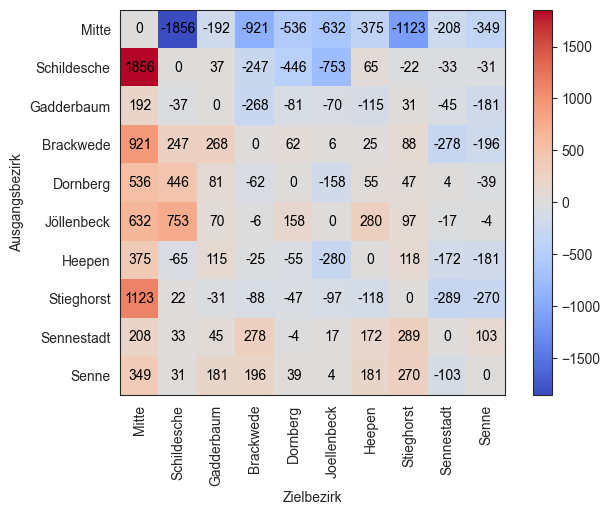

In [29]:
# Spaltenbezeichnungen ändern (nur Bezirk)
grouped_saldo_per_bezirk.columns = grouped_saldo_per_bezirk.columns.str.split('_').str[-1].str.capitalize()

# Heatmap
matrix = grouped_saldo_per_bezirk.values

plt.figure(figsize=(7, 5))
plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(grouped_saldo_per_bezirk.index)):
    for j in range(len(grouped_saldo_per_bezirk.columns)):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()

plt.xticks(np.arange(len(grouped_saldo_per_bezirk.columns)), grouped_saldo_per_bezirk.columns, rotation=90)
plt.yticks(np.arange(len(grouped_saldo_per_bezirk.index)), grouped_saldo_per_bezirk.index)

plt.xlabel('Zielbezirk')
plt.ylabel('Ausgangsbezirk')

plt.show()



Lesebeispiel: Mitte “verliert” von 2014 bis 2023 *netto* 1856 Einwohner an Schildesche.

Bei fast allen Stadtbezirken scheint die geographische Nähe zueinander der häufigste Grund für eine Bevölkerungswanderung zwischen zwei Bezirken zu sein.